<a href="https://colab.research.google.com/github/atul-ai/OCRExperiments/blob/main/TesseractQualityImprovementExercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal

We will run through Quality Improvement help page of Tesseract https://tesseract-ocr.github.io/tessdoc/ImproveQuality - and try the options and parameters to see what improvements it makes.

## Data

We will use the Maratha Empire History books found on the internet to test out these features.

Books we will use are:
1. Maratha Hisotry - Re Examined https://ia600406.us.archive.org/11/items/in.gov.ignca.1115/1115_text.pdf
2. A History of Maratha People - https://www.forgottenbooks.com/en/download/AHistoryoftheMarathaPeople_10133171.pdf
3. ...

We will add more books here as we see them.

## Settings

### Image Processing

#### Rescaling
If the image is a very low resolution image, then you need to rescale the image to a higher resolution.
A slow but higher quality mechanism is -

`img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)`

A faster but lower quality mechanism is -

`img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)`.

#### Binarization

This is converting an image to black and white. Tesseract 5.0.0 added two new Leptonica based binarization methods: Adaptive Otsu and Sauvola. If you are not able to fix this by providing a better input image, you can try -
1. ImageJ Auto Threshold (java) https://imagej.net/plugins/auto-threshold OR
2. OpenCV Image Thresholding (python) https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html OR
3. scikit-image Thresholding documentation (python) https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html.

#### Noise Removal

Text dodcuments with age develop noise due to discoloration or other printing issues or paper issues. A few methods can be used to reduce this noise.

An example of such an image would be -
![Image in a markdown cell](https://tesseract-ocr.github.io/tessdoc/images/noise.png)

We can use 3 techniques Blurring, Dialation and Erosion. We will demonstrate impact of these 3 techniques on the above image.



##### Install required libraries.

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install pillow
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,087 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

Dilation, erosion, and blurring require a kernel matrix to work with. A good rule of thumb could be starting with small kernel values for small fonts. Similarly, for larger fonts, you may experiment with larger kernels.

In [ ]:
import cv2
import numpy as np
from PIL import Image
import pytesseract



In [ ]:
# Helper method to read the image
import os

def read_image(image_path):
    img = cv2.imread(image_path)
    return img

# Helper method to create a output path from inpuot path
def get_output_path(input_path, output_dir):
    file_name = os.path.basename(input_path).split('.')[0]
    output_path = os.path.join(output_dir, file_name())
    return output_path

import matplotlib.pyplot as plt
def cv2_imshow(cv2image):
    plt.imshow(cv2.cvtColor(cv2image, cv2.COLOR_BGR2RGB))
    plt.show()

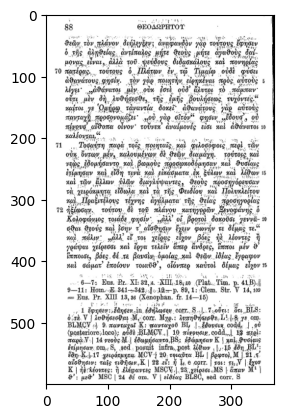

In [ ]:
#read image
image_path = '/content/data/noise.jpeg'
img = read_image(image_path)
cv2_imshow(img)

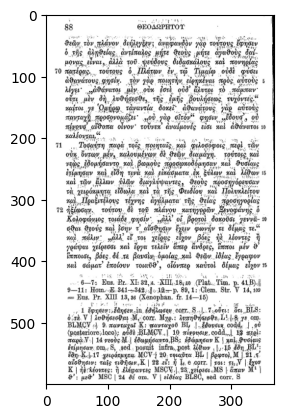

In [ ]:
# Convert to gray
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

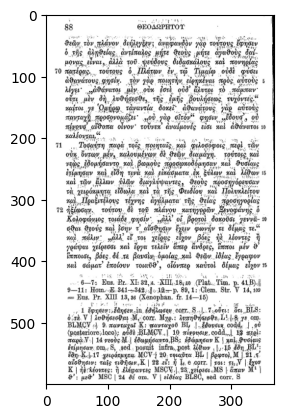

In [ ]:
# Apply dilation and erosion to remove some noise
kernel = np.ones((1, 1), np.uint8)
img = cv2.dilate(img, kernel, iterations=1)
cv2_imshow(img)

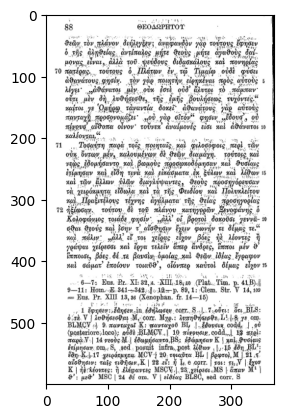

In [ ]:
# Erosion
img = cv2.erode(img, kernel, iterations=1)
cv2_imshow(img)

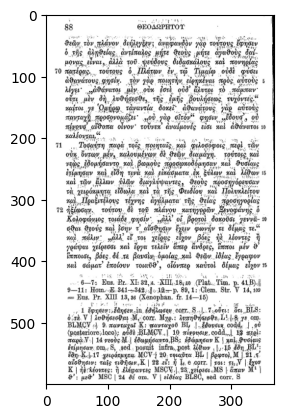

In [ ]:
# Apply blur to smooth out the edges
img = cv2.GaussianBlur(img, (1, 1), 0)
cv2_imshow(img)

## Appendix

1. A good overview of methods and techniques:
https://www.freecodecamp.org/news/getting-started-with-tesseract-part-ii-f7f9a0899b3f/
2.